In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
import os
pathSpecified = os.getcwd()
listOfFileNames = os.listdir(pathSpecified)  

## Loading Dataset

In [2]:
with open (listOfFileNames[4], "r") as file:
    dicts = json.load(file)
customer_transaction_info = pd.DataFrame(dicts['data'], columns = dicts['columns'])
customer_transaction_info

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,CA-2016-138688,1465689600000,1466035200000,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,US-2015-108966,1444521600000,1445126400000,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,US-2015-108966,1444521600000,1445126400000,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1390262400000,1390435200000,Second Class,TB-21400,FUR-FU-10001889,25.2480,3,0.20,4.1028
9990,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,FUR-FU-10000747,91.9600,2,0.00,15.6332
9991,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,TEC-PH-10003645,258.5760,2,0.20,19.3932
9992,CA-2017-121258,1488067200000,1488499200000,Standard Class,DB-13060,OFF-PA-10004041,29.6000,4,0.00,13.3200


In [3]:
with open (listOfFileNames[1], "r") as file:
    dicts = json.load(file)
    
customers_info = pd.DataFrame(dicts)
customers_info

,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...
4905,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008,West
4906,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605,South
4907,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South
4908,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West


In [4]:
with open (listOfFileNames[6], "r") as file:
    dicts = json.load(file)
    
orders_returned_info = pd.DataFrame(dicts).transpose()
orders_returned_info

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [5]:
with open (listOfFileNames[0], "r") as file:
    dicts = json.load(file)
    
product_info = pd.DataFrame(dicts['data'])
product_info.drop(columns=['index'], inplace=True)
product_info

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...
1889,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,TEC-PH-10002645,Technology,Phones,LG G2


In [6]:
with open (listOfFileNames[3], "r") as file:
    dicts = json.load(file)
    
region_seller_info = pd.DataFrame(dicts)
region_seller_info

,0,1,2,3
0,Anna Andreadi,West,Femail,45
1,Chuck Magee,East,G,43
2,Kelly Williams,Central,None,35
3,Cassandra Brandow,South,F,9849


## Merging all dataframe to in one dataframe

In [7]:
df = customer_transaction_info.merge(customers_info, on ='Customer ID', how= 'left')
new_df = df.merge(orders_returned_info, on='Order ID', how= 'left')
final_df = new_df.merge(product_info, on = 'Product ID', how= 'left')
final_df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,...,Segment,Country,City,State,Postal Code,Region,Returned,Category,Sub-Category,Product Name
0,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Henderson,Kentucky,42420,South,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Houston,Texas,77070,Central,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-BO-10001798,261.96,2,0.0,41.9136,...,Consumer,United States,Dallas,Texas,75217,Central,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase
3,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,...,Consumer,United States,Henderson,Kentucky,42420,South,NaN,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
4,CA-2016-152156,1478563200000,1478822400000,Second Class,CG-12520,FUR-CH-10000454,731.94,3,0.0,219.5820,...,Consumer,United States,Houston,Texas,77070,Central,NaN,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74373,CA-2017-119914,1493856000000,1494288000000,Second Class,CC-12220,OFF-AP-10002684,243.16,2,0.0,72.9480,...,Consumer,United States,Seattle,Washington,98103,West,NaN,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou..."
74374,CA-2017-119914,1493856000000,1494288000000,Second Class,CC-12220,OFF-AP-10002684,243.16,2,0.0,72.9480,...,Consumer,United States,Los Angeles,California,90032,West,NaN,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou..."
74375,CA-2017-119914,1493856000000,1494288000000,Second Class,CC-12220,OFF-AP-10002684,243.16,2,0.0,72.9480,...,Consumer,United States,Chesapeake,Virginia,23320,South,NaN,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou..."
74376,CA-2017-119914,1493856000000,1494288000000,Second Class,CC-12220,OFF-AP-10002684,243.16,2,0.0,72.9480,...,Consumer,United States,Chicago,Illinois,60653,Central,NaN,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou..."


In [8]:
filter_df = final_df[(final_df['Product Name'].str.contains('Printer')) & (final_df['Sub-Category'] == 'Machines')]
filter_df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Product ID,Sales,Quantity,Discount,Profit,...,Segment,Country,City,State,Postal Code,Region,Returned,Category,Sub-Category,Product Name
1316,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,San Antonio,Texas,78207,Central,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1317,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,New York City,New York,10024,East,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1318,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,Santa Barbara,California,93101,West,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1319,CA-2014-139892,1410134400000,1410480000000,Standard Class,BM-11140,TEC-MA-10000822,8159.952,8,0.4,-1359.9920,...,Consumer,United States,Des Moines,Washington,98198,West,NaN,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1694,CA-2015-169397,1450915200000,1451174400000,First Class,JB-15925,TEC-MA-10001148,479.988,4,0.7,-383.9904,...,Consumer,United States,Dublin,Ohio,43017,East,Yes,Technology,Machines,Okidata MB491 Multifunction Printer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70050,CA-2014-152618,1394755200000,1395014400000,First Class,RB-19465,TEC-MA-10003626,574.910,2,0.3,156.0470,...,Home Office,United States,Los Angeles,California,90036,West,NaN,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70051,CA-2014-152618,1394755200000,1395014400000,First Class,RB-19465,TEC-MA-10003626,574.910,2,0.3,156.0470,...,Home Office,United States,Milford,Connecticut,6460,East,NaN,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70052,CA-2014-152618,1394755200000,1395014400000,First Class,RB-19465,TEC-MA-10003626,574.910,2,0.3,156.0470,...,Home Office,United States,Tallahassee,Florida,32303,South,NaN,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70053,CA-2014-152618,1394755200000,1395014400000,First Class,RB-19465,TEC-MA-10003626,574.910,2,0.3,156.0470,...,Home Office,United States,Detroit,Michigan,48227,Central,NaN,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer


# Checking Shapes of entire data

In [9]:
filter_df.shape

(528, 21)

In [10]:
filter_df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Postal Code
count,5.280000e+02,5.280000e+02,528.000000,528.000000,528.000000,528.000000,528.000000
mean,1.458921e+12,1.459231e+12,1781.098667,3.518939,0.294886,48.020851,56107.933712
std,3.443776e+10,3.442608e+10,2065.691290,1.982758,0.239687,1175.936817,32245.881169
min,1.394755e+12,1.395014e+12,12.585000,1.000000,0.000000,-6599.978000,1810.000000
25%,1.432253e+12,1.432598e+12,447.968000,2.000000,0.200000,-111.499500,26913.500000
50%,1.464394e+12,1.464912e+12,837.600000,3.000000,0.200000,62.820000,58297.500000
75%,1.483747e+12,1.484006e+12,2548.560000,4.000000,0.500000,269.308000,90036.000000
max,1.514160e+12,1.514419e+12,9099.930000,11.000000,0.700000,2799.984000,99207.000000


In [11]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 1316 to 70054
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       528 non-null    object 
 1   Order Date     528 non-null    int64  
 2   Ship Date      528 non-null    int64  
 3   Ship Mode      528 non-null    object 
 4   Customer ID    528 non-null    object 
 5   Product ID     528 non-null    object 
 6   Sales          528 non-null    float64
 7   Quantity       528 non-null    int64  
 8   Discount       528 non-null    float64
 9   Profit         528 non-null    float64
 10  Customer Name  528 non-null    object 
 11  Segment        528 non-null    object 
 12  Country        528 non-null    object 
 13  City           528 non-null    object 
 14  State          528 non-null    object 
 15  Postal Code    528 non-null    int64  
 16  Region         528 non-null    object 
 17  Returned       65 non-null     object 
 18  Category  

# Checking missing values and missing percentage

In [12]:
missing = filter_df.isnull().sum()
miss_per = (missing/df.shape[0])*100
dic = {'No. of Missing value': missing, 'Missing percentage': miss_per}
dic = pd.DataFrame(dic)
dic

,No. of Missing value,Missing percentage
Order ID,0,0.000000
Order Date,0,0.000000
Ship Date,0,0.000000
Ship Mode,0,0.000000
Customer ID,0,0.000000
Product ID,0,0.000000
Sales,0,0.000000
Quantity,0,0.000000
Discount,0,0.000000
Profit,0,0.000000


# Handling missing values

In [13]:
filter_df['Returned'] = filter_df['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# EDA

# Graphical Analysis

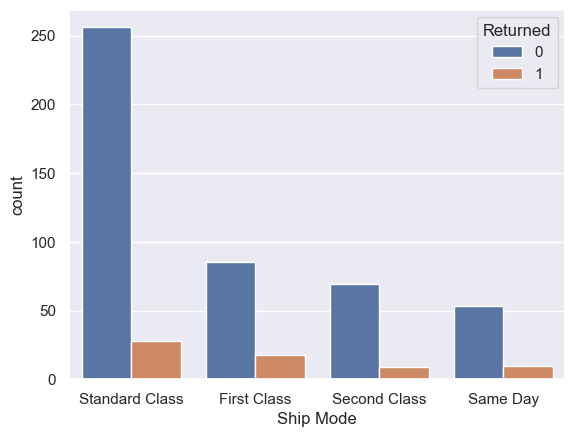

In [14]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = filter_df , x = 'Ship Mode', hue ='Returned')
plt.show()

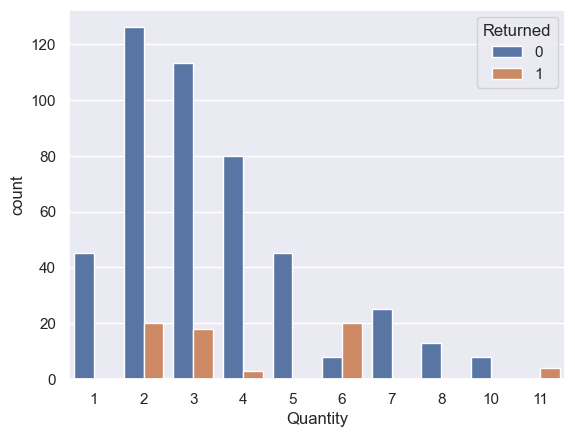

In [15]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = filter_df , x = 'Quantity', hue ='Returned')
plt.show()

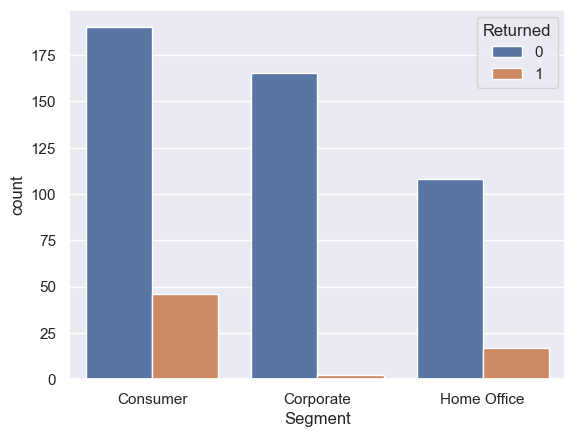

In [16]:
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = filter_df , x = 'Segment', hue ='Returned')
plt.show()

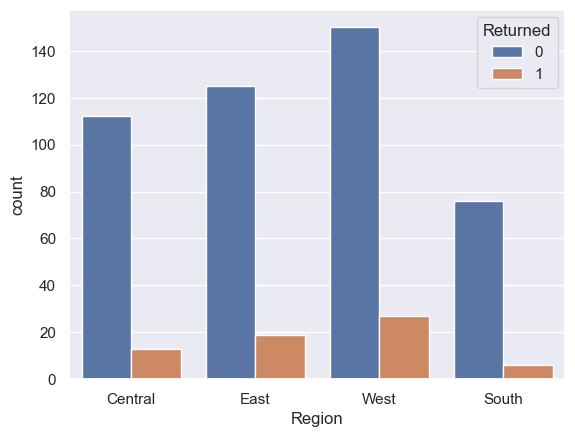

In [17]:
#plt.figure(figsize=(30, 30))
sns.set_style('whitegrid')
sns.set_theme(style='darkgrid')
sns.countplot(data = filter_df , x = 'Region', hue ='Returned')
plt.show()

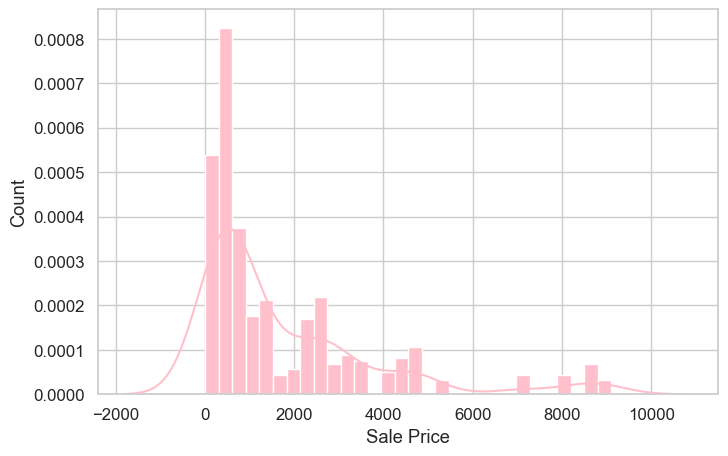

In [18]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    filter_df['Sales'], norm_hist=False, kde=True, color='pink', bins=30, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [19]:
def check_data_distribution(df):
    plt.figure(figsize=(30,40))
    
    for i,col in enumerate(df):
        plt.subplot(7,3,i + 1)
        sns.histplot(df[col], kde=True, bins= 20, color='blue')
    plt.tight_layout()
    plt.show()


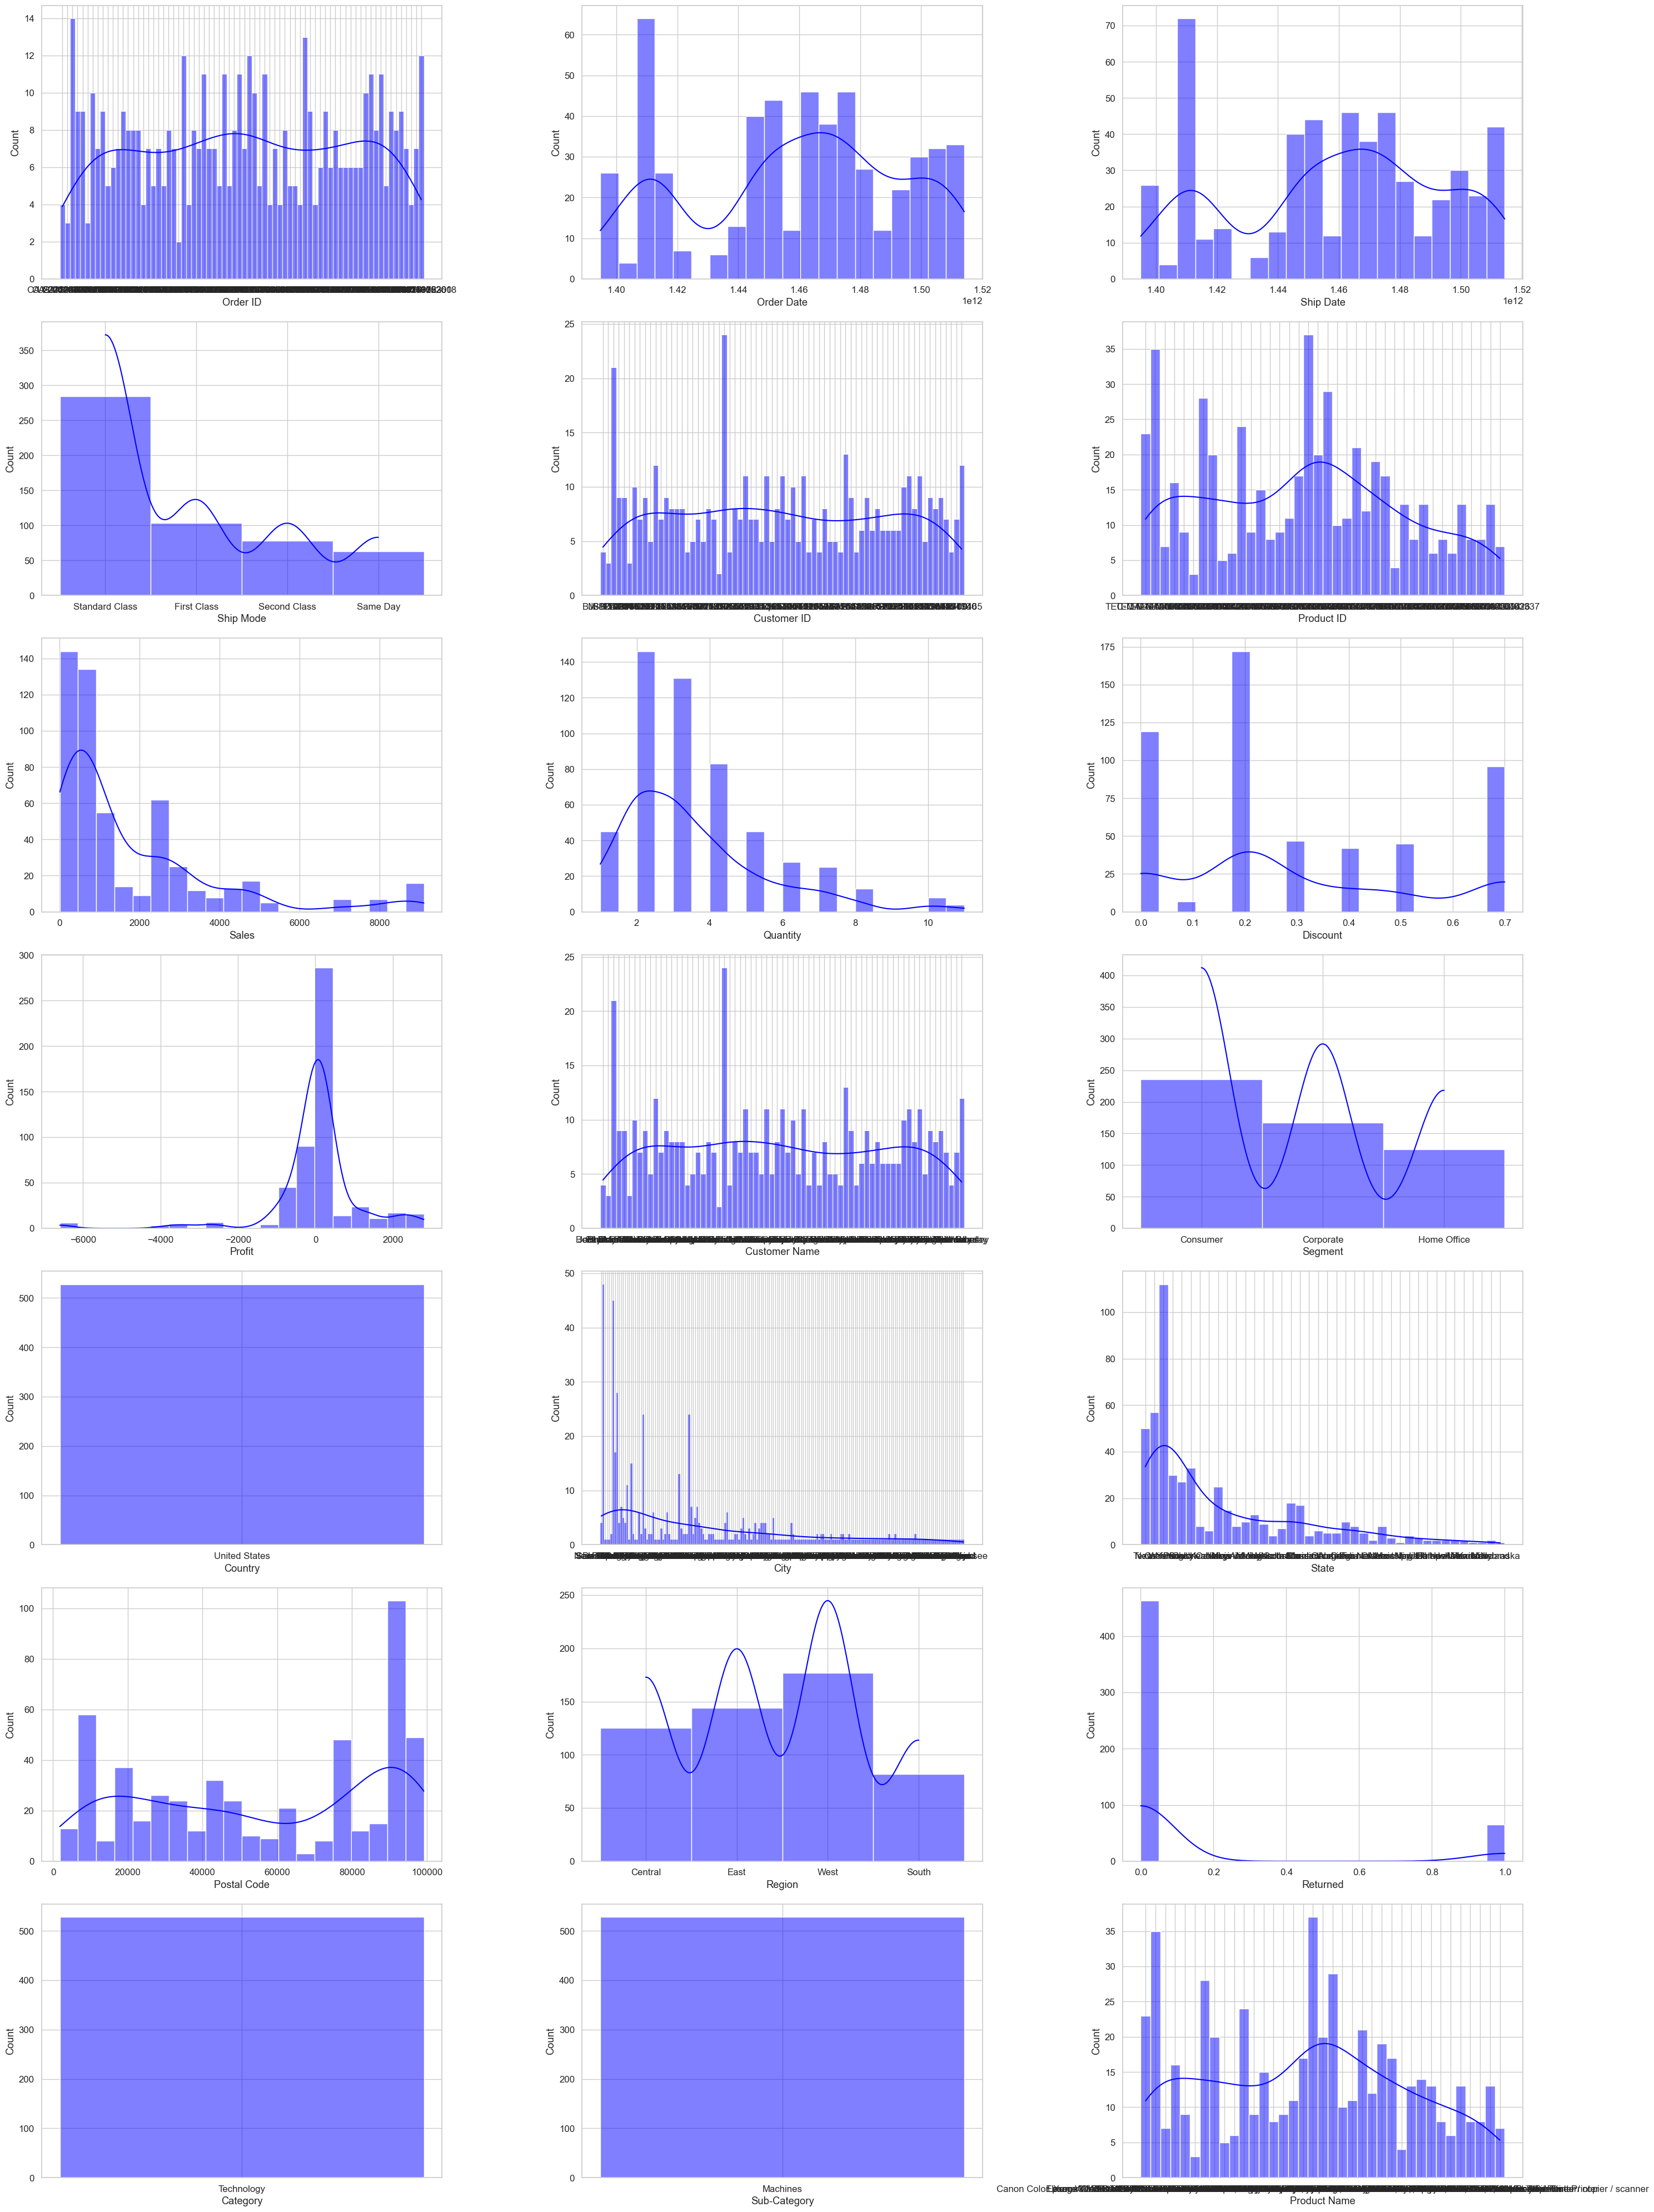

In [ ]:
check_data_distribution(filter_df)

# Checking Outlier

<Axes: ylabel='Sales'>

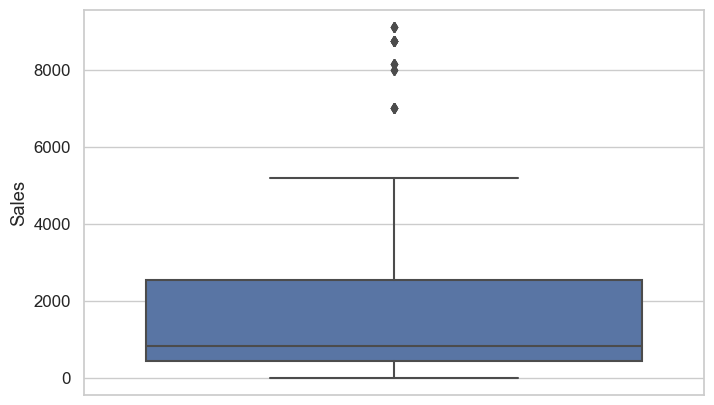

In [21]:
sns.boxplot(y='Sales', data=filter_df, color='b')

<Axes: ylabel='Discount'>

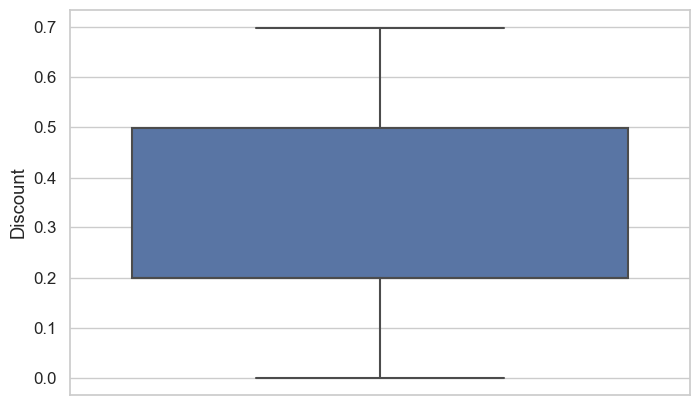

In [22]:
sns.boxplot(y='Discount', data=filter_df, color='b')

<Axes: ylabel='Profit'>

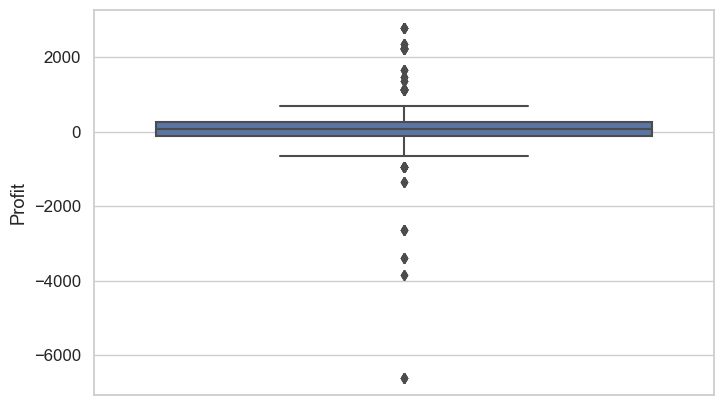

In [23]:
sns.boxplot(y='Profit', data=filter_df, color='b')

## Feature Engineering

In [24]:
drop_cols = ['Order ID', 'Order Date', 'Ship Date', 'Customer ID',
                         'Product ID', 'Customer Name', 'Postal Code']
filter_df.drop(columns= drop_cols, axis= 1, inplace= True)
filter_df

,Ship Mode,Sales,Quantity,Discount,Profit,Segment,Country,City,State,Region,Returned,Category,Sub-Category,Product Name
1316,Standard Class,8159.952,8,0.4,-1359.9920,Consumer,United States,San Antonio,Texas,Central,0,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1317,Standard Class,8159.952,8,0.4,-1359.9920,Consumer,United States,New York City,New York,East,0,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1318,Standard Class,8159.952,8,0.4,-1359.9920,Consumer,United States,Santa Barbara,California,West,0,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1319,Standard Class,8159.952,8,0.4,-1359.9920,Consumer,United States,Des Moines,Washington,West,0,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
1694,First Class,479.988,4,0.7,-383.9904,Consumer,United States,Dublin,Ohio,East,1,Technology,Machines,Okidata MB491 Multifunction Printer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70050,First Class,574.910,2,0.3,156.0470,Home Office,United States,Los Angeles,California,West,0,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70051,First Class,574.910,2,0.3,156.0470,Home Office,United States,Milford,Connecticut,East,0,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70052,First Class,574.910,2,0.3,156.0470,Home Office,United States,Tallahassee,Florida,South,0,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer
70053,First Class,574.910,2,0.3,156.0470,Home Office,United States,Detroit,Michigan,Central,0,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer


In [25]:
filter_df['Ship Mode'] = filter_df['Ship Mode'].map({'First Class': 1, 'Same Day' : 2, 'Second Class' : 3, 'Standard Class' : 4})
filter_df['Segment'] = filter_df['Segment'].map({'Consumer' : 1, 'Corporate' : 2, 'Home Office' : 3})
filter_df['Country'] = filter_df['Country'].map({'United States' : 1})
filter_df['Region'] = filter_df['Region'].map({'Central' : 1, 'East' : 2, 'South' : 3, 'West' : 4})
filter_df['Category'] = filter_df['Category'].map({'Technology' : 1})
filter_df['Sub-Category'] = filter_df['Sub-Category'].map({'Machines' : 1})
filter_df['Product Name'] = "Printer"
filter_df['Product Name'] = filter_df['Product Name'].map({'Printer' : 1})
filter_df['State'] = filter_df['State'].map({'Alabama' : 1, 'Arizona' : 2,'California' : 3,'Colorado' : 4,'Connecticut' : 5,'Delaware' : 6,'Florida' : 7,'Georgia' : 8,'Idaho' : 9,'Illinois' : 10,'Indiana' : 11,'Iowa' : 12,'Kansas' : 13, 
                                                                                         'Kentucky' : 14,'Maryland' : 15,'Massachusetts' : 16,'Michigan' : 17,'Minnesota' : 18,'Mississippi' : 19,'Missouri' : 20,'Nebraska' : 21,'Nevada' : 22,'New Hampshire' : 23,'New Jersey' : 24,'New Mexico' : 25,'New York' : 26, 
                                                                                         'North Carolina' : 27,'Ohio' : 28,'Oklahoma' : 29,'Oregon' : 30,'Pennsylvania' : 31,'Rhode Island' : 32,'South Carolina' : 33,'Tennessee' : 34,'Texas' : 35,'Utah' : 36,'Virginia' : 37,'Washington' : 38,'West Virginia' : 39,'Wisconsin' : 40})

filter_df['City'] = filter_df['City'].map({'Akron' : 1,'Alexandria' : 2,'Allentown' : 3,'Anaheim' : 4,'Andover' : 5,'Ann Arbor' : 6,'Apopka' : 7,'Arlington' : 8,'Aurora' : 9,'Austin' : 10,'Baltimore' : 11,'Bedford' : 12,'Bloomington' : 13,'Brentwood' : 14,'Bristol' : 15,'Broken Arrow' : 16,'Bullhead City' : 17,'Burbank' : 18,'Burlington' : 19,'Canton' : 20, 
                                                                                         'Carrollton' : 21,'Chandler' : 22,'Charlotte' : 23,'Chattanooga' : 24,'Chesapeake' : 25,'Chicago' : 26,'Cleveland' : 27,'Columbia' : 28,'Columbus' : 29,'Concord' : 30,'Corpus Christi' : 31,'Costa Mesa' : 32,'Cranston' : 33,'Dallas' : 34,'Decatur' : 35,'Deer Park' : 36,'Deltona' : 37,'Denver' : 38,'Des Moines' : 39,'Detroit' : 40,
                                                                                         'Dublin' : 41,'Durham' : 42,'Eagan' : 43,'Edinburg' : 44,'El Paso' : 45,'Evanston' : 46,'Everett' : 47,'Fayetteville' : 48,'Florence' : 49,'Fort Collins' : 50,'Franklin' : 51,'Fremont' : 52,'Glendale' : 53,'Grand Prairie' : 54,'Grand Rapids' : 55,'Green Bay' : 56,'Greensboro' : 57,'Greenville' : 58,'Gresham' : 59,'Hampton' : 60,  
                                                                                         'Hempstead' : 61,'Henderson' : 62,'Hendersonville' : 63,'Hialeah' : 64,'Highland Park' : 65,'Hillsboro' : 66,'Homestead' : 67,'Houston' : 68,'Huntington Beach' : 69,'Huntsville' : 70,'Jackson' : 71,'Jacksonville' : 72,'Kenosha' : 73,'Kent' : 74,'Knoxville' : 75,'La Mesa' : 76,'La Porte' : 77,'Lafayette' : 78,'Lakeville' : 79,'Lakewood' : 80, 
                                                                                         'Lancaster' : 81,'Las Cruces' : 82,'Las Vegas' : 83,'Lawrence' : 84,'Lawton' : 85,'Lewiston' : 86,'Long Beach' : 87,'Los Angeles' : 88,'Louisville' : 89,'Lubbock' : 90,'Manhattan' : 91,'Maple Grove' : 92,'Mason' : 93,'Mcallen' : 94,'Medford' : 95,'Miami' : 96,'Midland' : 97,'Milford' : 98,'Milwaukee' : 99,'Minneapolis' : 100,'Mission Viejo' : 101, 
                                                                                         'Mobile' : 102,'Modesto' : 103,'Monroe' : 104,'Montgomery' : 105,'Moorhead' : 106,'Morristown' : 107,'Murray' : 108,'Naperville' : 109,'Nashville' : 110,'New Bedford' : 111,'New Rochelle' : 112,'New York City' : 113,'Newark' : 114,'Newport News' : 115,'Noblesville' : 116,'Norwich' : 117,'Oceanside' : 118,'Oklahoma City' : 119,'Orange' : 120,'Orem' : 121, 
                                                                                         'Orlando' : 122,'Oxnard' : 123,'Palm Coast' : 124,'Pasadena' : 125,'Perth Amboy' : 126,'Philadelphia' : 127,'Phoenix' : 128,'Pico Rivera' : 129,'Plainfield' : 130,'Plano' : 131,'Pomona' : 132,'Portland' : 133,'Providence' : 134,'Provo' : 135,'Pueblo' : 136,'Raleigh' : 137,'Reading' : 138,'Redmond' : 139,'Renton' : 140,'Revere' : 141,'Richmond' : 142,'Rio Rancho' : 143, 
                                                                                         'Rochester' : 144,'Rock Hill' : 145,'Rockford' : 146,'Roseville' : 147,'Sacramento' : 148,'Saint Charles' : 149,'Saint Louis' : 150,'Saint Petersburg' : 151,'San Angelo' : 152,'San Antonio' : 153,'San Bernardino' : 154,'San Diego' : 155,'San Francisco' : 156,'San Jose' : 157,'Santa Barbara' : 158,'Santa Clara' : 159,'Seattle' : 160,'Skokie' : 161,'Sparks' : 162,'Spokane' : 163, 
                                                                                         'Springfield' : 164,'Sunnyvale' : 165,'Tallahassee' : 166,'Tampa' : 167,'Texas City' : 168,'Thomasville' : 169,'Thousand Oaks' : 170,'Tigard' : 171,'Tulsa' : 172,'Tuscaloosa' : 173,'Urbandale' : 174,'Vallejo' : 175,'Virginia Beach' : 176,'Waterbury' : 177,'Waterloo' : 178,'Westfield' : 179,'Wheeling' : 180,'Wilmington' : 181,'Yuma' : 182})

In [26]:
filter_df

,Ship Mode,Sales,Quantity,Discount,Profit,Segment,Country,City,State,Region,Returned,Category,Sub-Category,Product Name
1316,4,8159.952,8,0.4,-1359.9920,1,1,153,35,1,0,1,1,1
1317,4,8159.952,8,0.4,-1359.9920,1,1,113,26,2,0,1,1,1
1318,4,8159.952,8,0.4,-1359.9920,1,1,158,3,4,0,1,1,1
1319,4,8159.952,8,0.4,-1359.9920,1,1,39,38,4,0,1,1,1
1694,1,479.988,4,0.7,-383.9904,1,1,41,28,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70050,1,574.910,2,0.3,156.0470,3,1,88,3,4,0,1,1,1
70051,1,574.910,2,0.3,156.0470,3,1,98,5,2,0,1,1,1
70052,1,574.910,2,0.3,156.0470,3,1,166,7,3,0,1,1,1
70053,1,574.910,2,0.3,156.0470,3,1,40,17,1,0,1,1,1


In [27]:
from sklearn.utils import resample
filter_df.Returned.value_counts()

Returned
0    463
1     65
Name: count, dtype: int64

In [28]:
minority = filter_df[filter_df.Returned==1]
majority = filter_df[filter_df.Returned==0]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (65, 14)
Majority size: (463, 14)


In [29]:
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (463, 14)


In [30]:
filter_df = pd.concat([minority_upsample, majority], axis=0)

# Splitting the features

In [31]:
X = filter_df.drop(['Returned'], axis=1)
y = filter_df['Returned']

# Feature Selection

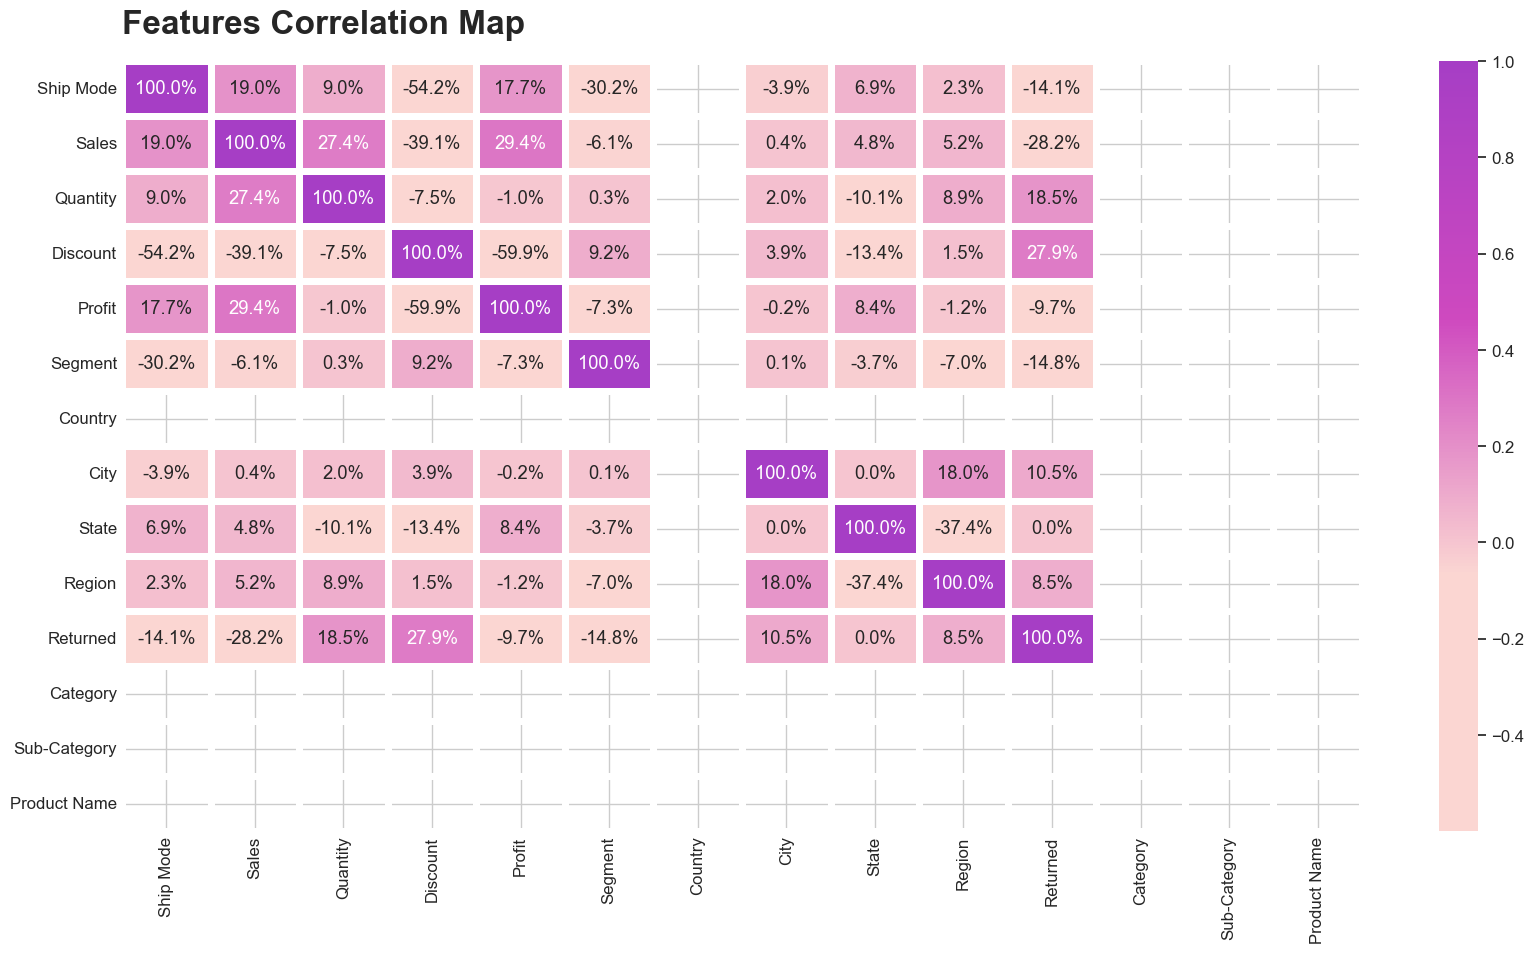

In [48]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
colors = ['#FBD6D2',"#FBD6D2", "#CE49BF","#A63EC5"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.heatmap(filter_df.corr(),annot=True,ax=ax,cmap=colormap,fmt='.1%',linewidth=5)
ax.tick_params(axis='both',which='both',length=0)
ax.text(0,-0.5,'Features Correlation Map',fontsize=24, fontweight='bold');
plt.show()

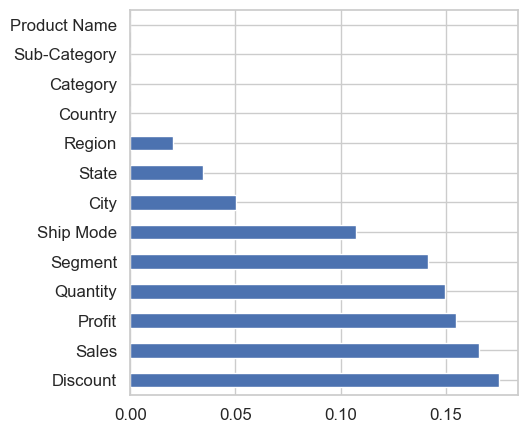

In [33]:
model = ExtraTreesClassifier()
model.fit(X, y)
plt.figure(figsize=(5,5))
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

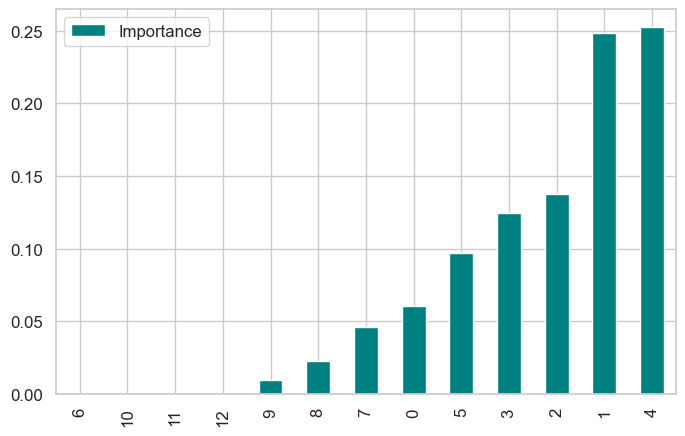

In [34]:
model = RandomForestClassifier(n_estimators= 400)
model.fit(X, y)
feat_importance = model.feature_importances_
final_df = pd.DataFrame({'features': pd.DataFrame(X).columns, 'Importance': feat_importance})
final_df.set_index('Importance')
final_df = final_df.sort_values('Importance')
final_df.plot.bar(color='teal')
plt.show()

# Training the Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Transforming the data using StandardScaler

In [36]:
sc = StandardScaler()
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Cross Validation using KFold CV

In [37]:
KFold_cv = KFold(n_splits= 5, shuffle= True)

# Building Models

Logistic Regression Model
Training accuracy: 0.668918918918919
Test accuracy: 0.6505376344086021
cross_val_score: [0.64189189 0.70945946 0.66216216 0.65540541 0.65540541]
classification_report:               precision    recall  f1-score   support

           0       0.66      0.71      0.68       372
           1       0.68      0.62      0.65       368

    accuracy                           0.67       740
   macro avg       0.67      0.67      0.67       740
weighted avg       0.67      0.67      0.67       740




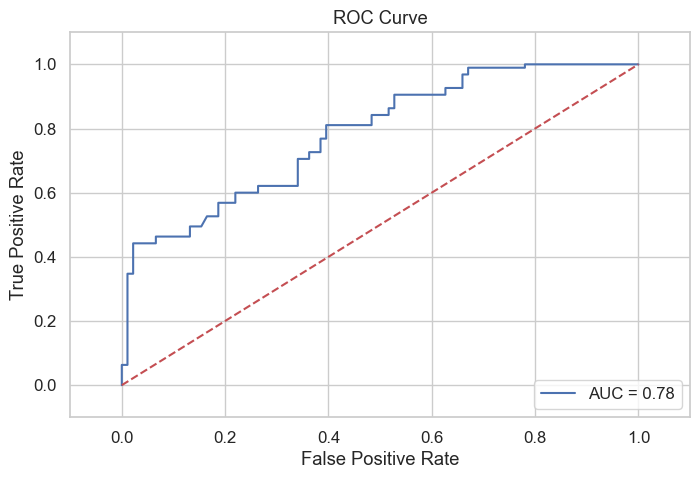

In [38]:
logistic_model = LogisticRegression(C= 0.23357214690901212, max_iter= 100, penalty= 'l2', solver= 'lbfgs')
logistic_model.fit(X_train_transformed, y_train)
scores = cross_val_score(logistic_model, X_train_transformed, y_train, cv= KFold_cv)
train_predictions = logistic_model.predict(X_train_transformed)
test_predictions = logistic_model.predict(X_test_transformed)
classifi_report = classification_report(y_train, train_predictions)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Logistic Regression Model')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()

y_preds = logistic_model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

RandomForestClassifier
Training accuracy: 1.0
Test accuracy: 0.989247311827957
cross_val_score: [0.97297297 0.99324324 0.99324324 0.98648649 1.        ]
classification_report:               precision    recall  f1-score   support

           0       0.66      0.71      0.68       372
           1       0.68      0.62      0.65       368

    accuracy                           0.67       740
   macro avg       0.67      0.67      0.67       740
weighted avg       0.67      0.67      0.67       740




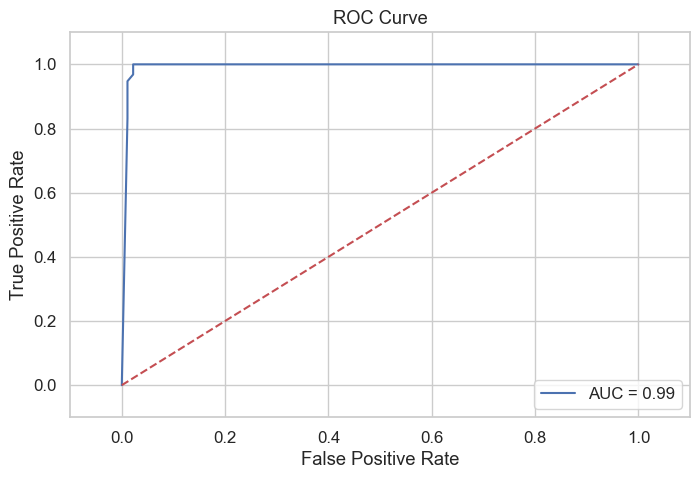

In [39]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
scores = cross_val_score(model, X_train_transformed, y_train, cv=KFold_cv)
classifi_report = classification_report(y_train, train_predictions)
train_predictions = model.predict(X_train_transformed)
test_predictions = model.predict(X_test_transformed)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print('RandomForestClassifier')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()

y_preds = model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

XGBClassifier
Training accuracy: 0.995945945945946
Test accuracy: 0.989247311827957
cross_val_score: [0.97297297 0.99324324 0.99324324 0.98648649 1.        ]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       372
           1       0.99      1.00      1.00       368

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740




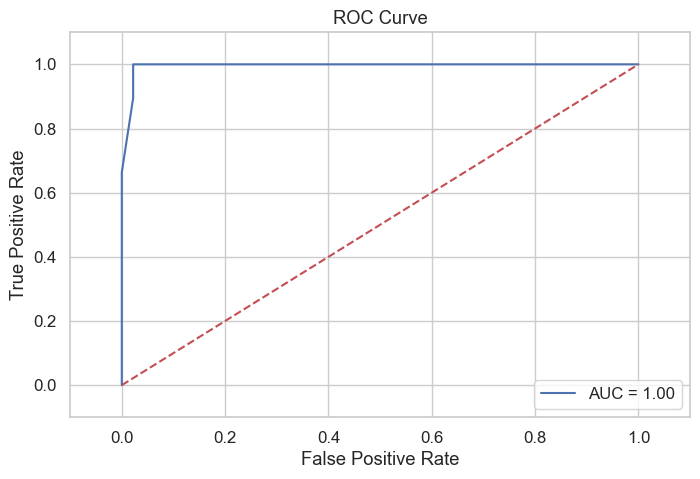

In [40]:
Xgb_model = XGBClassifier(base_score= 0.2, booster= 'gbtree', gamma= 1, learning_rate= 0.01, n_estimators= 500, reg_alpha= 1, reg_lambda= 0.5)
Xgb_model.fit(X_train_transformed, y_train)
# make predictions for test data
score = cross_val_score(Xgb_model, X_train_transformed, y_train, cv= KFold_cv)
train_predictions = Xgb_model.predict(X_train_transformed)
test_predictions = Xgb_model.predict(X_test_transformed)
classifi_report = classification_report(y_train, train_predictions)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print('XGBClassifier')
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("cross_val_score:", scores)
print("classification_report:", classifi_report)
print('=========================================')
print()



y_preds = Xgb_model.predict_proba(X_test_transformed)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(y_test, preds)

auc_score = auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [41]:
logistic_param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'C' : np.logspace(-4, 4, 20),
                        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                        'max_iter' : [100, 1000,2500, 5000]}

In [42]:
RandomForestparam_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [4,10,20,50,None]
}

In [43]:
Xgbparams = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}


In [44]:
# Rangrid_cv = GridSearchCV(RandomForestClassifier(n_jobs=-1), RandomForestparam_grid, n_jobs=-1, cv=KFold_cv, scoring='roc_auc')
# Rangrid_cv.fit(X_train, y_train)
# print('Best score:', Rangrid_cv.best_score_)
# print('Best params:', Rangrid_cv.best_params_)

In [45]:
# print('Best score:', Rangrid_cv.best_score_)
# print('Best params:', Rangrid_cv.best_params_)

In [46]:
# Loggrid_cv = GridSearchCV(LogisticRegression(n_jobs=-1), logistic_param_grid, n_jobs=-1, cv=KFold_cv, scoring='roc_auc')
# Loggrid_cv.fit(X_train_transformed, y_train)
# print('Best score:', Loggrid_cv.best_score_)
# print('Best params:', Loggrid_cv.best_params_)

# Plotting ROC and AUC curve to find out best model among of them.

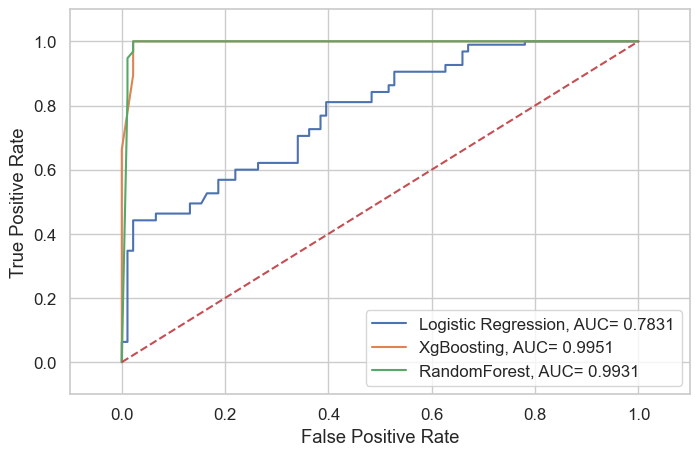

In [47]:
y_pred = logistic_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC= "+str(auc))

y_preds = Xgb_model.predict_proba(X_test_transformed)[:, 1]
fprs, tprs, __ = roc_curve(y_test, y_preds)
aucs = round(roc_auc_score(y_test, y_preds), 4)
plt.plot(fprs,tprs,label="XgBoosting, AUC= "+str(aucs))

y_preds_ = model.predict_proba(X_test_transformed)[:, 1]
fprs_, tprs_, _ = roc_curve(y_test, y_preds_)
aucs_ = round(roc_auc_score(y_test, y_preds_), 4)
plt.plot(fprs_,tprs_,label="RandomForest, AUC= "+str(aucs_))

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()